In [1]:
from importlib import reload
import numpy as np
from numpy import transpose, trace, multiply, power, dot
from numpy.linalg import multi_dot, matrix_power, norm
import scipy.stats as ss
from scipy.special import comb
import math
import pandas as pd
import time
from tqdm import tqdm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import pickle
import data_gen as dg
import stat_test as st
import visualizations as viz

In [2]:
# Reload modules in case of modifications
reload(dg)
reload(st)
reload(viz)

<module 'visualizations' from '/Users/louis.cammarata/Dropbox (MIT)/SBMtesting/Simulations-Python/visualizations.py'>

# Case 1: Powerless Chi2, Powerful SQ

In [3]:
# Test parameters
N_rep = 500
level = 0.05

In [4]:
# Data generation parameters
n = 300
K = 5
exact = True

In [5]:
# Initialize error dataframes
range_a = np.arange(0.2,0.6,0.1)
range_b = np.arange(0.05,0.09,0.01)
power_degree = np.zeros((len(range_a),len(range_b)))
power_SQ = np.zeros((len(range_a),len(range_b)))
power_PET = np.zeros((len(range_a),len(range_b)))

In [6]:
# Heatmap of the last A matrix (safety check)
plt.imshow(A)

NameError: name 'A' is not defined

In [7]:
# Read pickles
power_degree_df = pickle.load(open('Save/exp2_case1_power_degree_df.pkl', 'rb'))
power_SQ_df = pickle.load(open('Save/exp2_case1_power_SQ_df.pkl', 'rb'))
power_PET_df = pickle.load(open('Save/exp2_case1_power_PET_df.pkl', 'rb'))

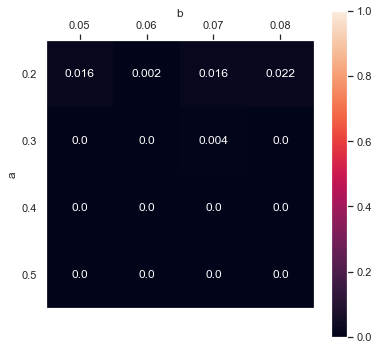

In [10]:
#viz.heatmap_with_values(power_degree_df, save_to='Save/exp2_case1_power_degree_df.png')
viz.heatmap_with_values(power_degree_df, save_to='')

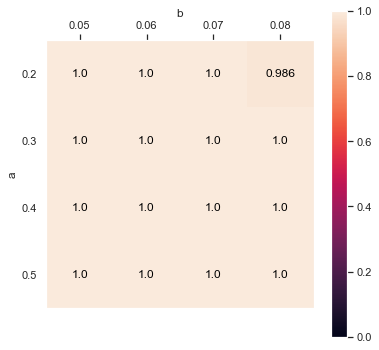

In [124]:
#viz.heatmap_with_values(power_SQ_df, save_to='Save/exp2_case1_power_SQ_df.png')
viz.heatmap_with_values(power_SQ_df, save_to='')

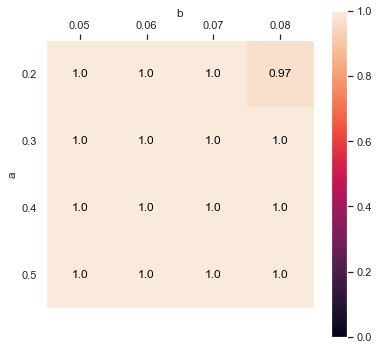

In [125]:
#viz.heatmap_with_values(power_PET_df, save_to='Save/exp2_case1_power_PET_df.png')
viz.heatmap_with_values(power_PET_df, save_to='')

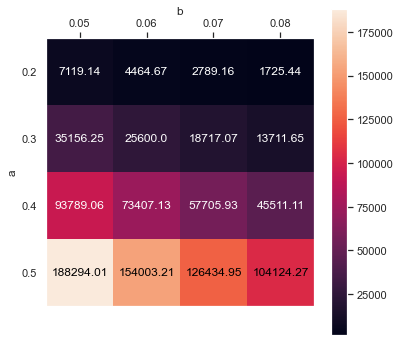

In [126]:
# Plot value of the phase transition parameter
tau_mat = np.zeros((len(range_a),len(range_b)))
for i in range(len(range_a)):
    for j in range(len(range_b)):
        a = range_a[i]
        b = range_b[j]
        tau_mat[i,j] = (n**2)*((a+(K-1)*b)**(-2))*(K**2)*((a-b)**4)
# Cast rho_mat as dataframe
tau_df = pd.DataFrame(np.round(tau_mat,2), np.round(range_a,2), np.round(range_b,2))
# Plot heatmap of rho_df
viz.heatmap_with_values(tau_df, cmap_scale=False, save_to='Save/exp2_case1_tau_df.png')

# Case 2: Powerful Chi2, Powerless SQ

In [101]:
# Test parameters
N_rep = 500
level = 0.05

In [102]:
# Data generation parameters
b = 1
K = 2
exact = True

In [103]:
# Initialize error dataframes
range_n = np.array([200, 300, 400, 500])
range_c = np.array([0.2,0.25,0.3,0.35])
power_degree = np.zeros((len(range_n),len(range_c)))
power_SQ = np.zeros((len(range_n),len(range_c)))
power_PET = np.zeros((len(range_n),len(range_c)))

In [104]:
# Run simulations
np.random.seed(seed=13)
for k in tqdm(range(N_rep)):
    time.sleep(0.01)
    for i in range(len(range_n)):
        n = range_n[i]
        for j in range(len(range_c)):
            c = range_c[j] 
            a = b+1/n**(1/4)
            eta = np.concatenate((np.repeat(a,int(K/2)),np.repeat(b,int(K/2)))).reshape((K,1))
            eta = eta/norm(eta)
            A = dg.sample_alt_adj_matrix_rank1(n, K, eta, c, exact)
            power_degree[i,j] += st.degree_test(A, level, two_sided=False)['reject']
            power_SQ[i,j] += st.SQ_test(A, level)['reject']
            power_PET[i,j] += st.PET_test(A, level)['reject']
power_degree = power_degree/N_rep
power_SQ = power_SQ/N_rep
power_PET = power_PET/N_rep

100%|██████████| 500/500 [06:40<00:00,  1.25it/s]


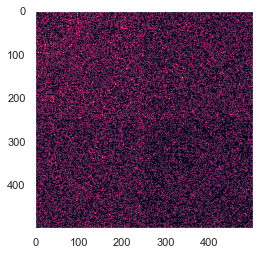

In [105]:
# Heatmap of the last A matrix (safety check)
plt.imshow(A)

In [108]:
# Read pickles
power_degree_df = pickle.load(open('Save/exp2_case2_power_degree_df.pkl', 'rb'))
power_SQ_df = pickle.load(open('Save/exp2_case2_power_SQ_df.pkl', 'rb'))
power_PET_df = pickle.load(open('Save/exp2_case2_power_PET_df.pkl', 'rb'))

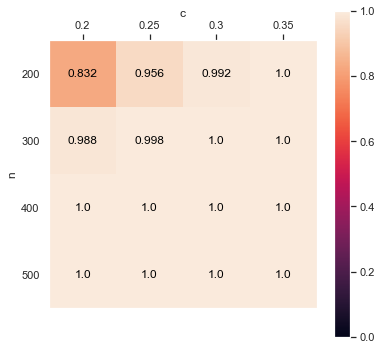

In [109]:
viz.heatmap_with_values(power_degree_df, xlabel='c', ylabel='n', save_to='Save/exp2_case2_power_degree_df.png')
#viz.heatmap_with_values(power_degree_df, xlabel='c', ylabel='n', save_to='')

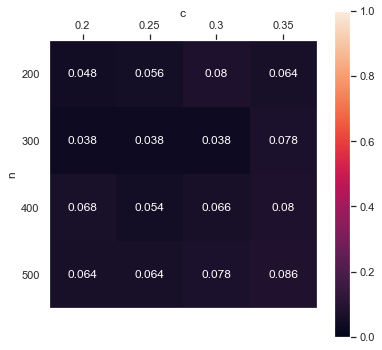

In [110]:
viz.heatmap_with_values(power_SQ_df, xlabel='c', ylabel='n', save_to='Save/exp2_case2_power_SQ_df.png')

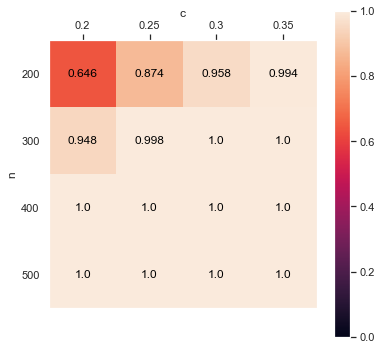

In [111]:
viz.heatmap_with_values(power_PET_df, xlabel='c', ylabel='n', save_to='Save/exp2_case2_power_PET_df.png')

In [112]:
# Plot value of the phase transition parameter
delta_mat = np.zeros((len(range_n),len(range_c)))
tau_mat = np.zeros((len(range_n),len(range_c)))
for i in range(len(range_n)):
    n = range_n[i]
    for j in range(len(range_c)):
        c = range_c[j] 
        a = b+1/n**(1/4)
        delta_mat[i,j] = (n**1.5)*c*(a-b)**2/(a**2+b**2)/2
        tau_mat[i,j] = (n**2)*(c*(a-b)**2/(a**2+b**2)/4)**2*((a-b)/(a+b)+(4+(a-b)**2/(a+b)**2)**0.5)**4
delta_df = pd.DataFrame(np.round(delta_mat,2), np.round(range_n,2), np.round(range_c,2))
tau_df = pd.DataFrame(np.round(tau_mat,2), np.round(range_n,2), np.round(range_c,2))
beta_df = delta_df.where(delta_df > tau_df, tau_df)
maxval = beta_df.max().max()

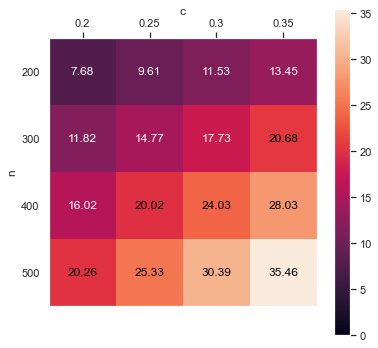

In [113]:
# Plot heatmap of delta_df
viz.heatmap_with_values(delta_df, xlabel='c', ylabel='n', cmap_scale=False, cmap_min=0, cmap_max=maxval, save_to='Save/exp2_case2_delta_df.png')

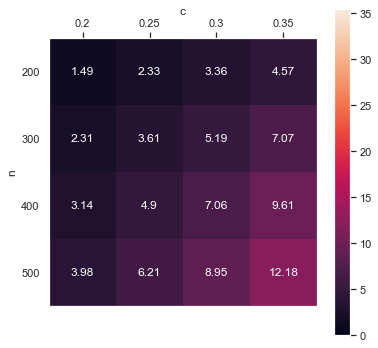

In [114]:
# Plot heatmap of tau_df
viz.heatmap_with_values(tau_df, xlabel='c', ylabel='n', cmap_scale=False, cmap_min=0, cmap_max=maxval, save_to='Save/exp2_case2_tau_df.png')

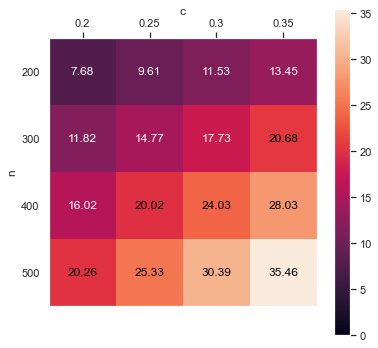

In [115]:
# Plot heatmap of beta_df
viz.heatmap_with_values(beta_df, xlabel='c', ylabel='n', cmap_scale=False, cmap_min=0, cmap_max=maxval, save_to='Save/exp2_case2_beta_df.png')